## Length of the code {-}
No restriction

**Delete this section from the report, when using this template.** 

In [3]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import time 
import itertools 

## Data quality check / cleaning / preparation 

Put code with comments. The comments should explain the code such that it can be easily understood. You may put text *(in a markdown cell)* before a large chunk of code to explain the overall purpose of the code, if it is not intuitive. **Put the name of the person / persons who contributed to each code chunk / set of code chunks.** An example is given below.

### Data quality check
*By Luke Lilienthal*

The code below visualizes the distribution of all the variables in the dataset, and their association with the response.

In [4]:
train = pd.read_csv('Effect on Education')

In [5]:
#...Distribution of continuous variables...#
train.describe()

# We look at the scale of variance and quartiles across predictors. 
# The range of values is important to note in order to interpret coefficient results.

,Wage,AFQT,Educ,Exper,Age,Meduc,Logwage
count,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000
mean,1002.269841,101.868481,13.673469,11.555556,33.068027,10.716553,6.826152
std,417.337401,14.882141,2.259817,4.226779,3.012836,2.902025,0.414586
min,233.000000,50.000000,9.000000,1.000000,28.000000,0.000000,5.451038
25%,690.000000,93.000000,12.000000,8.000000,31.000000,8.000000,6.536692
50%,947.000000,103.000000,13.000000,11.000000,33.000000,12.000000,6.853299
75%,1200.000000,112.000000,16.000000,15.000000,36.000000,12.000000,7.090077
max,2500.000000,137.000000,18.000000,22.000000,38.000000,18.000000,7.824046


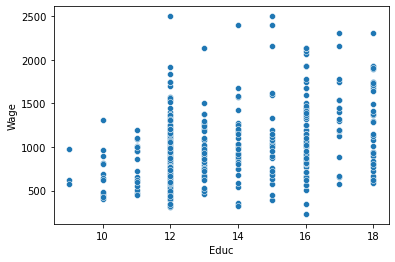

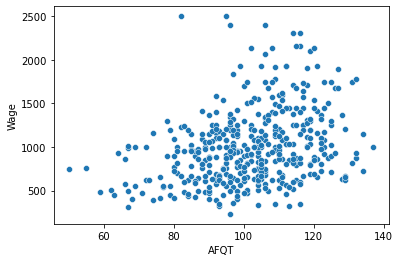

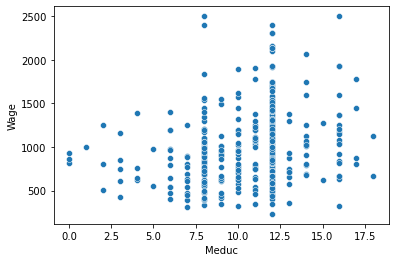

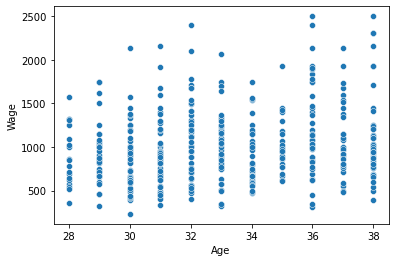

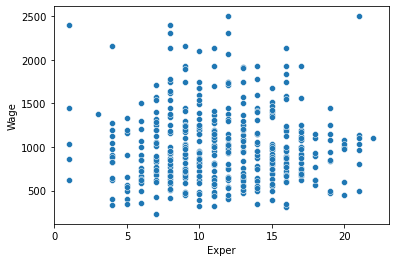

In [6]:
#...Association of the response with the predictors...#

#Now, look for patterns in individual predictor scatterplots
sns.scatterplot(x=train.Educ, y=train.Wage)
plt.show()

sns.scatterplot(x=train.AFQT, y=train.Wage)
plt.show()

sns.scatterplot(x=train.Meduc, y=train.Wage)
plt.show()

sns.scatterplot(x=train.Age, y=train.Wage)
plt.show()

sns.scatterplot(x=train.Exper, y=train.Wage)
plt.show()

# General positive trends with Wage and fairly weak associations. 
# Apparent non-linear trends with AFQT and Educ

### Data cleaning
*By Xena Valenzuela*

From the data quality check we realized that:

1. Some of the columns that should have contained only numeric values, specifically <>, <>, and <> have special characters such as \*, #, %. We'll remove these characters, and convert the datatype of these columns to numeric.

2. Some of the columns have more than 60% missing values, and it is very difficult to impute their values, as the values seem to be missing at random with negligible association with other predictors. We'll remove such columns from the data.

3. The column `number_of_bedrooms` has some unreasonably high values such as 15. As our data consist of single-family homes in Evanston, we suspect that any value greater than 5 may be incorrect. We'll replace all values that are greater than 5 with an estimate obtained using the $K$-nearest neighbor approach.

4. The columns `house_price` has some unreasonably high values. We'll tag all values greater than 1 billion dollars as "potentially incorrect observation", to see if they distort our prediction / inference later on.

The code below implements the above cleaning.

In [ ]:
#...Code with comments...#

### Data preparation
*By Sankaranarayanan Balasubramanian and Chun-Li*

The following data preparation steps helped us to prepare our data for implementing various modeling / validation techniques:

1. Since we need to predict house price, we derived some new predictors *(from existing predictors)* that intuitively seem to be helpuful to predict house price. 

2. We have shuffled the dataset to prepare it for K-fold cross validation.

3. We have created a standardized version of the dataset, as we will use it to develop Lasso / Ridge regression models.

In [18]:
# split data into training and testing data
y = train.iloc[:, 0]
X = train.iloc[:, [1, 2, 3, 4, 5, 6]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)

In [3]:
######---------------Creating new predictors----------------#########

#Creating number of bedrooms per unit floor area

#Creating ratio of bathrooms to bedrooms

#Creating ratio of carpet area to floor area

In [ ]:
######-----------Shuffling the dataset for K-fold------------#########

In [ ]:
######-----Standardizing the dataset for Lasso / Ridge-------#########

In [ ]:
## Splitting data, 

## Exploratory data analysis

Put code with comments. The comments should explain the code such that it can be easily understood. You may put text *(in a markdown cell)* before a large chunk of code to explain the overall purpose of the code, if it is not intuitive. **Put the name of the person / persons who contributed to each code chunk / set of code chunks.**

Initial Model

In [7]:
initialmodel = smf.ols(formula = 'Wage~I(AFQT**2)+Educ+Exper-1', data = train).fit()
initialmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   Wage   R-squared (uncentered):                   0.877
Model:                            OLS   Adj. R-squared (uncentered):              0.876
Method:                 Least Squares   F-statistic:                              1043.
Date:                Wed, 08 Mar 2023   Prob (F-statistic):                   5.78e-199
Time:                        16:36:47   Log-Likelihood:                         -3245.9
No. Observations:                 441   AIC:                                      6498.
Df Residuals:                     438   BIC:                                      6510.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
I(AFQT ** 2)     0.0222      0.007      3.039      0.003       0.008       0.037
Educ            46.9293      6.314      7.433      0.000      34.520      59.339
Exper           11.2422      3.404      3.302      0.001       4.552      17.933
==============================================================================
Omnibus:                       72.042   Durbin-Watson:                   1.828
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              119.371
Skew:                           0.985   Prob(JB):                     1.20e-26
Kurtosis:                       4.618   Cond. No.                     3.93e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 3.93e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<AxesSubplot:>

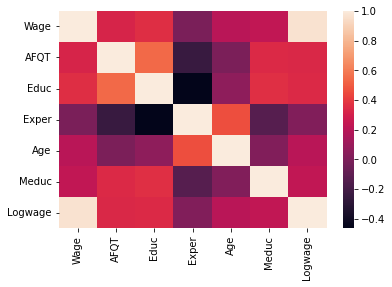

In [8]:
sns.heatmap(train.corr())

Colinearity analysis - by Diqiao Wang

In [10]:
X = train[['AFQT','Educ','Exper','Age','Meduc','Logwage','Wage']]
X.columns[1:]

Index(['Educ', 'Exper', 'Age', 'Meduc', 'Logwage', 'Wage'], dtype='object')

In [11]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
X = add_constant(X)
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

for i in range(len(X.columns)):
    vif_data.loc[i,'VIF'] = variance_inflation_factor(X.values, i)

print(vif_data)

   feature          VIF
0    const  2899.875648
1     AFQT     1.518805
2     Educ     2.091154
3    Exper     1.868437
4      Age     1.463662
5    Meduc     1.204196
6  Logwage    14.050784
7     Wage    14.000315


In [ ]:
#VIF for wage in the initial model

In [12]:
1/(1-0.877)

8.130081300813009

Stepwise Selection

## Developing the model

Put code with comments. The comments should explain the code such that it can be easily understood. You may put text *(in a markdown cell)* before a large chunk of code to explain the overall purpose of the code, if it is not intuitive. **Put the name of the person / persons who contributed to each code chunk / set of code chunks.**

Final Model - by Luke

In [29]:
modelfinal1 = smf.ols(formula='Wage~I(AFQT**2)*Educ+Exper-1', data=train).fit()
modelfinal1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   Wage   R-squared (uncentered):                   0.881
Model:                            OLS   Adj. R-squared (uncentered):              0.880
Method:                 Least Squares   F-statistic:                              645.1
Date:                Wed, 08 Mar 2023   Prob (F-statistic):                   1.69e-159
Time:                        17:09:04   Log-Likelihood:                         -2581.1
No. Observations:                 352   AIC:                                      5170.
Df Residuals:                     348   BIC:                                      5186.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
I(AFQT ** 2)          0.0015      0.017      0.091      0.928      -0.031       0.034
Educ                 32.3469      7.639      4.234      0.000      17.322      47.372
I(AFQT ** 2):Educ     0.0021      0.001      1.956      0.051   -1.21e-05       0.004
Exper                19.4391      5.085      3.823      0.000       9.438      29.440
==============================================================================
Omnibus:                       56.857   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               96.136
Skew:                           0.939   Prob(JB):                     1.33e-21
Kurtosis:                       4.741   Cond. No.                     6.64e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 6.64e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
#Using logwage

In [14]:
modelfinal_log = smf.ols(formula='Logwage~I(AFQT**2)*Educ+Exper-1', data=train).fit()
modelfinal_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                Logwage   R-squared (uncentered):                   0.996
Model:                            OLS   Adj. R-squared (uncentered):              0.996
Method:                 Least Squares   F-statistic:                          2.709e+04
Date:                Wed, 08 Mar 2023   Prob (F-statistic):                        0.00
Time:                        16:43:51   Log-Likelihood:                         -257.09
No. Observations:                 441   AIC:                                      522.2
Df Residuals:                     437   BIC:                                      538.5
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
I(AFQT ** 2)          0.0005    1.7e-05     26.531      0.000       0.000       0.000
Educ                  0.4557      0.008     55.706      0.000       0.440       0.472
I(AFQT ** 2):Educ -3.136e-05   1.12e-06    -27.950      0.000   -3.36e-05   -2.92e-05
Exper                 0.0391      0.005      7.381      0.000       0.029       0.050
==============================================================================
Omnibus:                        3.214   Durbin-Watson:                   1.729
Prob(Omnibus):                  0.200   Jarque-Bera (JB):                3.059
Skew:                          -0.202   Prob(JB):                        0.217
Kurtosis:                       3.061   Cond. No.                     6.87e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 6.87e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Assumptions - by Diqiao

In [15]:
# Fixing library names
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import time 
import itertools 

RMSE check

In [30]:
pred_wage = modelfinal1.predict(train)
np.sqrt(((train.Wage - pred_wage)**2).mean())

370.1347897346834

In [31]:
pred_wage = modelfinal1.predict(test)
np.sqrt(((test.Wage - pred_wage)**2).mean())

410.8099542822619

RMSEs are similar - no overfitting.
Also, RMSEs are low - good prediction.

Satisfy the linear assumption.

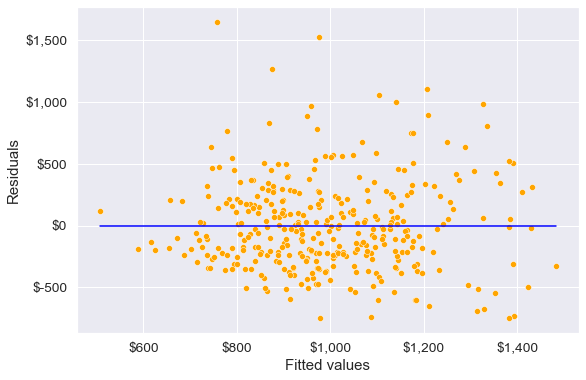

In [48]:
pred_wage = modelfinal1.predict(train)

#Plotting residuals vs fitted values
plt.rcParams["figure.figsize"] = (9,6)
sns.set(font_scale=1.25)
ax = sns.scatterplot(x = modelfinal1.fittedvalues, y=modelfinal1.resid,color = 'orange')
sns.lineplot(x = [pred_wage.min(),pred_wage.max()],y = [0,0],color = 'blue')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
ax.yaxis.set_major_formatter('${x:,.0f}')
ax.xaxis.set_major_formatter('${x:,.0f}')

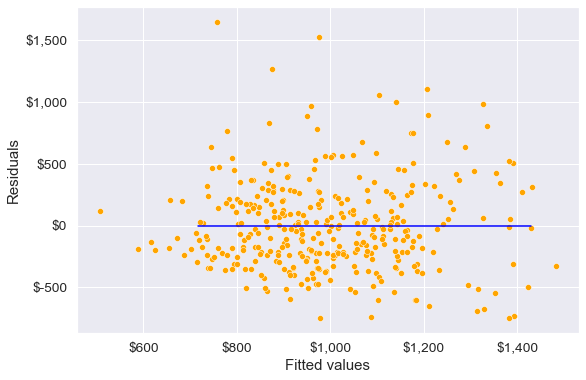

In [49]:
pred_wage = modelfinal1.predict(test)

#Plotting residuals vs fitted values
plt.rcParams["figure.figsize"] = (9,6)
sns.set(font_scale=1.25)
ax = sns.scatterplot(x = modelfinal1.fittedvalues, y=modelfinal1.resid,color = 'orange')
sns.lineplot(x = [pred_wage.min(),pred_wage.max()],y = [0,0],color = 'blue')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
ax.yaxis.set_major_formatter('${x:,.0f}')
ax.xaxis.set_major_formatter('${x:,.0f}')

In [38]:
#Errors: normally distributed

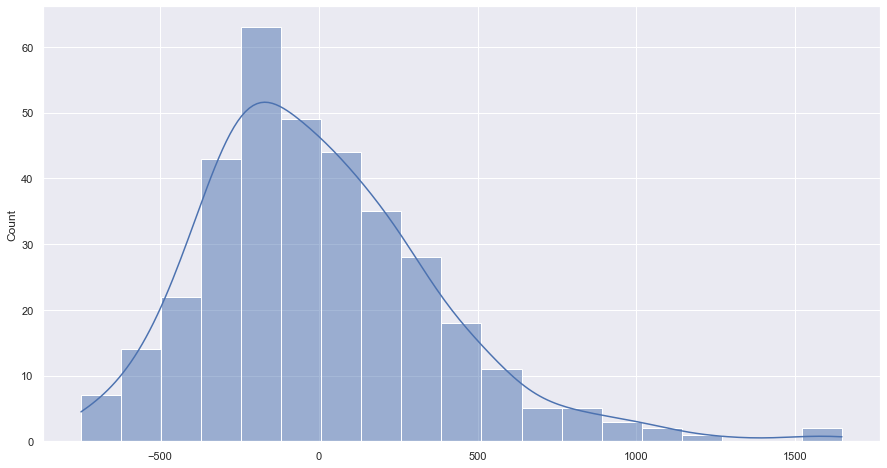

In [41]:
sns.histplot(data=modelfinal1.resid, kde=True)
plt.show()

In [42]:
#Homoscedasticity

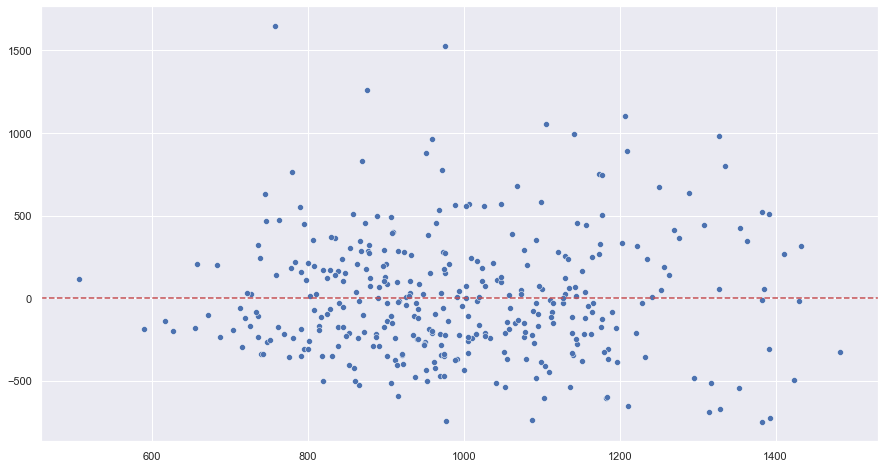

In [43]:
sns.scatterplot(data=train, x=modelfinal1.predict(), y=modelfinal1.resid)
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

In [44]:
#Outliers&leverages&influencials

In [34]:
out_1 = modelfinal1.outlier_test()
np.sum((np.abs(out_1.student_resid)>3))

4

In [46]:
influence_1 = modelfinal1.get_influence()

0

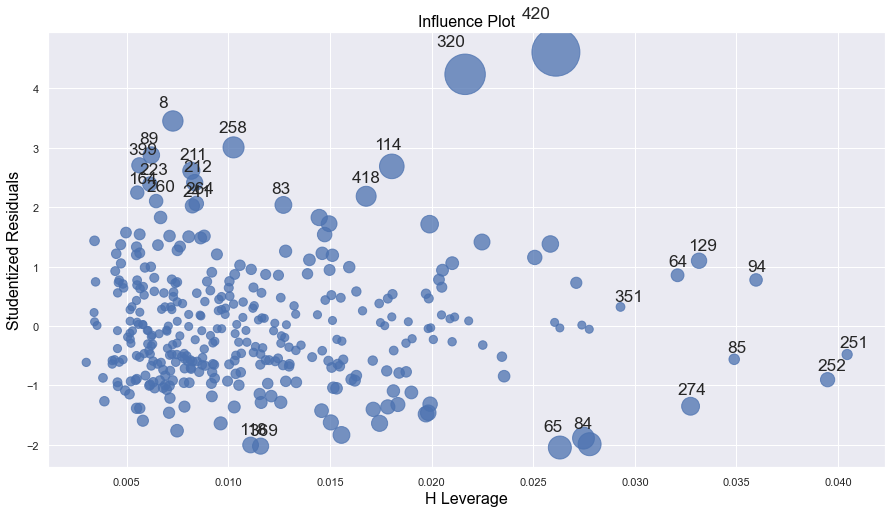

In [45]:
leverage_1 = influence_1.hat_matrix_diag

sns.set(rc={'figure.figsize':(15,8)})
sm.graphics.influence_plot(modelfinal1);
out = modelfinal1.outlier_test()
average_leverage_1 = (modelfinal1.df_model+1)/modelfinal1.nobs
high_leverage_threshold_1 = 4*average_leverage_1
np.sum(leverage_1>high_leverage_threshold_1)

### Code fitting the final model

Put the code(s) that fit the final model(s) in separate cell(s), i.e., the code with the `.ols()` or `.logit()` functions.

## Conclusions and Recommendations to stakeholder(s)

You may or may not have code to put in this section. Delete this section if it is irrelevant.